##19.2 Loading the MNIST dataset in Keras

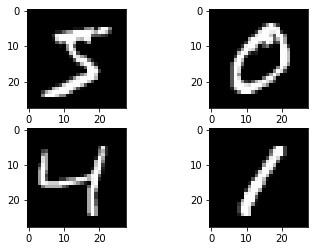

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))

# show the plot
plt.show()

##19.3 Baseline Model with Multilayer Perceptrons
simple Multilayer Perceptron model that achieves an error rate of approximately 1.73%.

###Step1: Import Classes and Function

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

###Step2: Initialize the random number generator

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

###Step3: Load the MNIST Dataset

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Step4: Prepare MNIST Dataset for modelling

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

###Step5: Normalize Pixel Values

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

###Step6: One Hot Encode the Output Variable

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

###Step7: Define and Compile the Baseline Model

In [ ]:
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' ,activation= 'relu' ))
  model.add(Dense(num_classes, kernel_initializer= 'normal' , activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

###Step8: Evaluate the Baseline Model

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 10s - loss: 0.2815 - accuracy: 0.9206 - val_loss: 0.1347 - val_accuracy: 0.9599 - 10s/epoch - 33ms/step
Epoch 2/10
300/300 - 7s - loss: 0.1124 - accuracy: 0.9675 - val_loss: 0.0963 - val_accuracy: 0.9719 - 7s/epoch - 24ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0715 - accuracy: 0.9788 - val_loss: 0.0838 - val_accuracy: 0.9744 - 4s/epoch - 15ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0505 - accuracy: 0.9855 - val_loss: 0.0700 - val_accuracy: 0.9766 - 5s/epoch - 16ms/step
Epoch 5/10
300/300 - 5s - loss: 0.0361 - accuracy: 0.9897 - val_loss: 0.0627 - val_accuracy: 0.9799 - 5s/epoch - 16ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0258 - accuracy: 0.9935 - val_loss: 0.0614 - val_accuracy: 0.9808 - 5s/epoch - 16ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0196 - accuracy: 0.9952 - val_loss: 0.0582 - val_accuracy: 0.9812 - 5s/epoch - 15ms/step
Epoch 8/10
300/300 - 5s - loss: 0.0160 - accuracy: 0.9960 - val_loss: 0.0601 - val_accuracy: 0.9814 - 5s/epoch - 16ms/step
Epoch 9/10
300

### FULL CODE

In [ ]:
# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' ,activation= 'relu' ))
  model.add(Dense(num_classes, kernel_initializer= 'normal' , activation= 'softmax' ))

  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2799 - accuracy: 0.9219 - val_loss: 0.1398 - val_accuracy: 0.9597 - 5s/epoch - 17ms/step
Epoch 2/10
300/300 - 5s - loss: 0.1104 - accuracy: 0.9681 - val_loss: 0.0986 - val_accuracy: 0.9710 - 5s/epoch - 15ms/step
Epoch 3/10
300/300 - 5s - loss: 0.0714 - accuracy: 0.9791 - val_loss: 0.0743 - val_accuracy: 0.9771 - 5s/epoch - 16ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0494 - accuracy: 0.9855 - val_loss: 0.0705 - val_accuracy: 0.9781 - 5s/epoch - 15ms/step
Epoch 5/10
300/300 - 5s - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.0627 - val_accuracy: 0.9806 - 5s/epoch - 16ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0257 - accuracy: 0.9934 - val_loss: 0.0642 - val_accuracy: 0.9807 - 5s/epoch - 16ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0190 - accuracy: 0.9956 - val_loss: 0.0602 - val_accuracy: 0.9799 - 5s/epoch - 17ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0643 - val_accuracy: 0.9799 - 4s/epoch - 15ms/step
Epoch 9/10
300/3

##19.4 Simple Convolutional Neural Network for MNIST

###Step1: Import Classes and Functions

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# fix dimension ordering issue
from keras import backend as K
#The latest version has replaced the image_dim_ordering to image_data_format.
#K.set_image_dim_ordering( 'th' )
#channel_last = (batch_size, height, width, channels) --> tf
K.set_image_data_format('channels_last')

###Step2: Seed Random Number Generator

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

###Step3: Load Dataset and Separate Into Train and Test Sets

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# change to(batch_size, height, width, channels) --> tf
# height = 1, width = 28, channels=28
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )

###Step4: Normalize and One hot encode

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

###Step5: Define and Compile CNN model

In [ ]:
def baseline_model():
  # create model
  model = Sequential()
  # change to(batch_size, height, width, channels) --> tf
  # height = 1, width = 28, channels=28
  #model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation= 'relu' )) --> this is channels_first, th
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

###Step6: Fit and Evaluate the CNN Model

In [ ]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 33s 108ms/step - loss: 0.2465 - accuracy: 0.9295 - val_loss: 0.0787 - val_accuracy: 0.9780
Epoch 2/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0735 - accuracy: 0.9781 - val_loss: 0.0514 - val_accuracy: 0.9834
Epoch 3/10
300/300 [==============================] - 32s 107ms/step - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 4/10
300/300 [==============================] - 32s 107ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 5/10
300/300 [==============================] - 32s 107ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0385 - val_accuracy: 0.9862
Epoch 6/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 7/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0331 - val_ac

###FULL CODE

In [19]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# fix dimension ordering issue
from keras import backend as K
#The latest version has replaced the image_dim_ordering to image_data_format.
#K.set_image_dim_ordering( 'th' )
#channel_last = (batch_size, height, width, channels) --> tf
K.set_image_data_format('channels_last')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# change to(batch_size, height, width, channels) --> tf
# height = 1, width = 28, channels=28
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
  # create model
  model = Sequential()
  # change to(batch_size, height, width, channels) --> tf
  # height = 1, width = 28, channels=28
  #model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation= 'relu' )) --> this is channels_first, th
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 34s 111ms/step - loss: 0.2543 - accuracy: 0.9275 - val_loss: 0.0919 - val_accuracy: 0.9723
Epoch 2/10
300/300 [==============================] - 32s 107ms/step - loss: 0.0788 - accuracy: 0.9764 - val_loss: 0.0522 - val_accuracy: 0.9824
Epoch 3/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0480 - val_accuracy: 0.9829
Epoch 4/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0385 - val_accuracy: 0.9878
Epoch 5/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0385 - val_accuracy: 0.9872
Epoch 6/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 7/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0360 - val_ac

##19.5 Larger Convolutional Neural Network for MNIST

In [1]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#The latest version has replaced the image_dim_ordering to image_data_format.
#K.set_image_dim_ordering( 'th' )
K.set_image_data_format('channels_last')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
# create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(50, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

# build the model
model = larger_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 47s 154ms/step - loss: 0.3825 - accuracy: 0.8806 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 2/10
300/300 [==============================] - 38s 127ms/step - loss: 0.0972 - accuracy: 0.9700 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 3/10
300/300 [==============================] - 38s 128ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 4/10
300/300 [==============================] - 39s 131ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0375 - val_accuracy: 0.9876
Epoch 5/10
300/300 [==============================] - 38s 128ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0288 - val_accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 38s 127ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0273 - val_accuracy: 0.9912
Epoch 7/10
300/300 [==============================] - 38s 128ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0296 - val_ac